In [1]:
# Sample API
import flowx
import simulation
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 100, 50
xmin, xmax = -3.0, 7.0
ymin, ymax = -2.5, 2.5

# Define cell-centered variable names
center_vars   = ['pres', 'divv']
face_vars     = ['velc', 'hvar']
ins_vars      = ['velc', 'hvar', 'divv', 'pres']
poisson_vars  = ['pres', 'divv']

scalar_info   = {'tmax' : 10, 
                 'dt' : 0.01, 
                 'Re' : 100.0}

simulation_info = {'time_stepping' : 'ab2', 
                   'poisson_solver' : 'serial_cg', 
                   'maxiter' : 2000,
                   'tol' : 1e-10}

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_center = {'pres': ['neumann', 'neumann', 'neumann', 'neumann']}
bc_val_center  = {'pres': [0.0, 0.0, 0.0, 0.0]}

bc_type_facex = {'velc': ['dirichlet', 'outflow', 'dirichlet', 'neumann']}
bc_val_facex  = {'velc': [1.0, 0.0, 0.0, 0.0]}

bc_type_facey = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_facey  = {'velc': [0.0, 0.0, 0.0, 0.0]}

# Create the grid and data
gridc, gridx, gridy, scalars, particles = flowx.serial.domain_main(nx, ny, xmin, xmax, ymin, ymax,
                                              center_vars, face_vars, scalar_info,
                                              bc_type_center=bc_type_center, bc_val_center=bc_val_center,
                                              bc_type_facex=bc_type_facex, bc_val_facex=bc_val_facex,
                                              bc_type_facey=bc_type_facey, bc_val_facey=bc_val_facey)

domain_data_struct = [gridc, gridx, gridy, scalars, particles]

poisson = flowx.poisson_main(gridc, poisson_vars, simulation_info)

imbound = flowx.imbound_main(domain_data_struct)

ins = flowx.ins_main(poisson, imbound, domain_data_struct, ins_vars, simulation_info)

In [3]:
simulation.set_initial_velocity(gridc, gridx, gridy, 'velc', 'pres')

------------ Time = 0.01 ---------------
Number of poisson iterations    : 0
Final poisson residual : 0.0
Max, Min, U   : 1.0, -1.0
Max, Min, V   : 0.0, 0.0
Max, Min, P   : 0.0, 0.0
Max, Min, DIV : 0.0, 0.0


------------ Time = 0.02 ---------------
Number of poisson iterations    : 241
Final poisson residual : 7.280974031226364e-11
Max, Min, U   : 1.0059427154072973, -1.0
Max, Min, V   : 0.014993433875868555, -0.014993433875868555
Max, Min, P   : 0.8911245429963331, -0.8911245429963331
Max, Min, DIV : 5.1050230151028844e-09, -5.10502298799783e-09


------------ Time = 0.03 ---------------
Number of poisson iterations    : 290
Final poisson residual : 8.621823480655664e-11
Max, Min, U   : 1.0098088996330241, -1.0
Max, Min, V   : 0.02477603472520537, -0.02477603472520537
Max, Min, P   : 0.5765742195083967, -0.5620513635557451
Max, Min, DIV : 4.472148208803676e-09, -4.526620958509388e-09


------------ Time = 0.04 ---------------
Number of poisson iterations    : 268
Final poisson residu

------------ Time = 0.25000000000000006 ---------------
Number of poisson iterations    : 267
Final poisson residual : 8.885195356962885e-11
Max, Min, U   : 1.0508541640626516, -1.0
Max, Min, V   : 0.12680902471821245, -0.12680902471821245
Max, Min, P   : 0.4775384083869826, -0.2385987651889562
Max, Min, DIV : 6.686728084214985e-09, -6.676435879843234e-09


------------ Time = 0.26000000000000006 ---------------
Number of poisson iterations    : 266
Final poisson residual : 9.8345269968663e-11
Max, Min, U   : 1.0526091234005526, -1.0
Max, Min, V   : 0.12919282964532264, -0.12919282964532264
Max, Min, P   : 0.4748027848741175, -0.22986932266218574
Max, Min, DIV : 6.3413911304661084e-09, -7.173246001097172e-09


------------ Time = 0.2700000000000001 ---------------
Number of poisson iterations    : 266
Final poisson residual : 9.295561621935877e-11
Max, Min, U   : 1.0543291883133858, -1.0
Max, Min, V   : 0.13130750630851584, -0.13130750630851584
Max, Min, P   : 0.472175995164383, -0.221

------------ Time = 0.5000000000000002 ---------------
Number of poisson iterations    : 255
Final poisson residual : 9.764235663781165e-11
Max, Min, U   : 1.082990914319269, -1.0
Max, Min, V   : 0.13094852217820113, -0.13094852217820113
Max, Min, P   : 0.43332989014449746, -0.11609387245130592
Max, Min, DIV : 6.92057056626838e-09, -5.845872405943475e-09


------------ Time = 0.5100000000000002 ---------------
Number of poisson iterations    : 255
Final poisson residual : 9.009666194964414e-11
Max, Min, U   : 1.0840693984104528, -1.0
Max, Min, V   : 0.12964943861749426, -0.12964943861749426
Max, Min, P   : 0.4322919824063916, -0.11372526275233583
Max, Min, DIV : 6.609959793055231e-09, -5.749334246532567e-09


------------ Time = 0.5200000000000002 ---------------
Number of poisson iterations    : 254
Final poisson residual : 9.145005610922314e-11
Max, Min, U   : 1.085113380130594, -1.0
Max, Min, V   : 0.12849298963610875, -0.12849298963610875
Max, Min, P   : 0.4312899706623567, -0.1115

------------ Time = 0.7400000000000004 ---------------
Number of poisson iterations    : 237
Final poisson residual : 9.731638657109139e-11
Max, Min, U   : 1.099318944410246, -1.0
Max, Min, V   : 0.11756204680877168, -0.10175957645828393
Max, Min, P   : 0.4157316627179671, -0.0826719281581544
Max, Min, DIV : 6.482412084982819e-09, -5.924560273797008e-09


------------ Time = 0.7500000000000004 ---------------
Number of poisson iterations    : 233
Final poisson residual : 9.714792265510395e-11
Max, Min, U   : 1.0995988793497706, -1.0
Max, Min, V   : 0.11751784822554738, -0.10051378043725329
Max, Min, P   : 0.41523496734923754, -0.08195383042079356
Max, Min, DIV : 5.792808776335524e-09, -5.915611073908922e-09


------------ Time = 0.7600000000000005 ---------------
Number of poisson iterations    : 232
Final poisson residual : 9.389838521565511e-11
Max, Min, U   : 1.099852387211306, -1.0
Max, Min, V   : 0.11745985514251725, -0.09935091114741709
Max, Min, P   : 0.41475153116290464, -0.081

------------ Time = 0.9900000000000007 ---------------
Number of poisson iterations    : 233
Final poisson residual : 8.926762305855613e-11
Max, Min, U   : 1.1140796157001, -1.0
Max, Min, V   : 0.11640123489269137, -0.07523253790339335
Max, Min, P   : 0.40655489245265, -0.07199879207066041
Max, Min, DIV : 5.922116870244604e-09, -6.027315961002616e-09


------------ Time = 1.0000000000000007 ---------------
Number of poisson iterations    : 232
Final poisson residual : 9.826680128211381e-11
Max, Min, U   : 1.1146546770427501, -1.0
Max, Min, V   : 0.11644535918595506, -0.07432111983826657
Max, Min, P   : 0.4063006412280752, -0.07171188774213644
Max, Min, DIV : 6.264605628843699e-09, -6.2139014376724755e-09




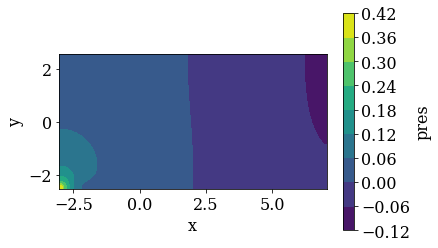

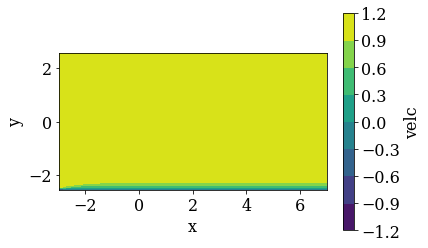

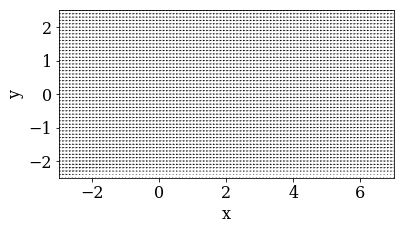

------------ Time = 1.0100000000000007 ---------------
Number of poisson iterations    : 232
Final poisson residual : 9.487743431542146e-11
Max, Min, U   : 1.115202529905059, -1.0
Max, Min, V   : 0.11649682924750011, -0.07341153615262999
Max, Min, P   : 0.40605318634262844, -0.07142065133281586
Max, Min, DIV : 5.9996543386609674e-09, -6.1379546627618464e-09


------------ Time = 1.0200000000000007 ---------------
Number of poisson iterations    : 232
Final poisson residual : 9.066211096504636e-11
Max, Min, U   : 1.1157233689987298, -1.0
Max, Min, V   : 0.11655510265191582, -0.07250520717416674
Max, Min, P   : 0.4058123471617328, -0.07112520238868703
Max, Min, DIV : 5.509899926939288e-09, -5.892686466275714e-09


------------ Time = 1.0300000000000007 ---------------
Number of poisson iterations    : 231
Final poisson residual : 9.996490700660998e-11
Max, Min, U   : 1.116217448027425, -1.0
Max, Min, V   : 0.1166196039289198, -0.07160348423604247
Max, Min, P   : 0.40557794764987554, -0.0

------------ Time = 1.2500000000000009 ---------------
Number of poisson iterations    : 222
Final poisson residual : 9.79358730842199e-11
Max, Min, U   : 1.1226410383315872, -1.0
Max, Min, V   : 0.11845740963425751, -0.0663582880619291
Max, Min, P   : 0.4017288638896756, -0.06348549828815912
Max, Min, DIV : 5.254677075405834e-09, -6.979808012813615e-09


------------ Time = 1.260000000000001 ---------------
Number of poisson iterations    : 222
Final poisson residual : 9.588272024571995e-11
Max, Min, U   : 1.122857272671378, -1.0
Max, Min, V   : 0.11852044124143826, -0.06636089181496758
Max, Min, P   : 0.4016006453378799, -0.06313121941896743
Max, Min, DIV : 4.928354131045198e-09, -6.887084957885037e-09


------------ Time = 1.270000000000001 ---------------
Number of poisson iterations    : 222
Final poisson residual : 9.294378243622237e-11
Max, Min, U   : 1.12305502555477, -1.0
Max, Min, V   : 0.11857992419100598, -0.06636372266519208
Max, Min, P   : 0.4014755680877745, -0.062776344

------------ Time = 1.490000000000001 ---------------
Number of poisson iterations    : 215
Final poisson residual : 9.930963855681155e-11
Max, Min, U   : 1.1242780794193301, -1.0
Max, Min, V   : 0.11918120045971034, -0.0664335574063907
Max, Min, P   : 0.3993669970096879, -0.05642008226342492
Max, Min, DIV : 4.95314494280974e-09, -6.309859544584295e-09


------------ Time = 1.500000000000001 ---------------
Number of poisson iterations    : 215
Final poisson residual : 9.909609359031004e-11
Max, Min, U   : 1.1242586894146962, -1.0
Max, Min, V   : 0.11919058553629326, -0.06643563364188952
Max, Min, P   : 0.3992950671470897, -0.05636780450167674
Max, Min, DIV : 5.549184688147246e-09, -6.248575615264151e-09


------------ Time = 1.5100000000000011 ---------------
Number of poisson iterations    : 216
Final poisson residual : 7.907347059835471e-11
Max, Min, U   : 1.1242377062691593, -1.0
Max, Min, V   : 0.1191996557506897, -0.0664375664239262
Max, Min, P   : 0.3992248590266333, -0.05631465

------------ Time = 1.7400000000000013 ---------------
Number of poisson iterations    : 215
Final poisson residual : 9.534748598482939e-11
Max, Min, U   : 1.1259848332913331, -1.0
Max, Min, V   : 0.11946176978952298, -0.0664546746493831
Max, Min, P   : 0.3980125215322057, -0.05477477023739817
Max, Min, DIV : 5.398028350266787e-09, -5.810549567539236e-09


------------ Time = 1.7500000000000013 ---------------
Number of poisson iterations    : 215
Final poisson residual : 9.170875132181755e-11
Max, Min, U   : 1.1260570447551175, -1.0
Max, Min, V   : 0.11947641934765547, -0.06645488021005938
Max, Min, P   : 0.3979744973053018, -0.0546938558209394
Max, Min, DIV : 5.403709563145398e-09, -5.642854313155088e-09


------------ Time = 1.7600000000000013 ---------------
Number of poisson iterations    : 215
Final poisson residual : 8.73774602955029e-11
Max, Min, U   : 1.1261238825717217, -1.0
Max, Min, V   : 0.11949113879850151, -0.06645508779786496
Max, Min, P   : 0.39793748526122735, -0.0546

------------ Time = 1.9700000000000015 ---------------
Number of poisson iterations    : 189
Final poisson residual : 9.488377824286954e-11
Max, Min, U   : 1.127650988564021, -1.0
Max, Min, V   : 0.11976448985783585, -0.066462982693837
Max, Min, P   : 0.3973575311460986, -0.052731394696845034
Max, Min, DIV : 6.010613951001886e-09, -6.786620245055781e-09


------------ Time = 1.9800000000000015 ---------------
Number of poisson iterations    : 190
Final poisson residual : 9.709248773386894e-11
Max, Min, U   : 1.127684680012895, -1.0
Max, Min, V   : 0.11977443939215456, -0.066463532240345
Max, Min, P   : 0.3973378069430767, -0.052636980331935534
Max, Min, DIV : 6.704402311097368e-09, -5.570832458529074e-09


------------ Time = 1.9900000000000015 ---------------
Number of poisson iterations    : 191
Final poisson residual : 9.604672503133907e-11
Max, Min, U   : 1.1277172853573318, -1.0
Max, Min, V   : 0.11978409113427498, -0.06646408964686053
Max, Min, P   : 0.39731868603943626, -0.05254

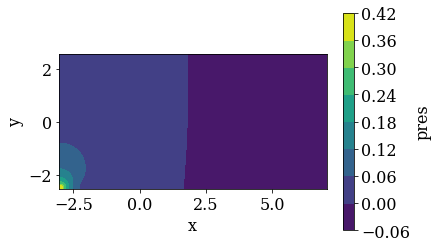

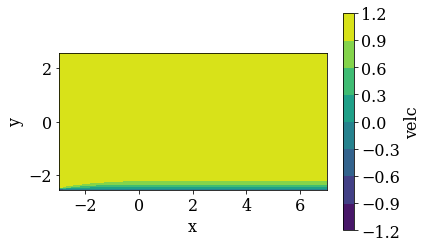

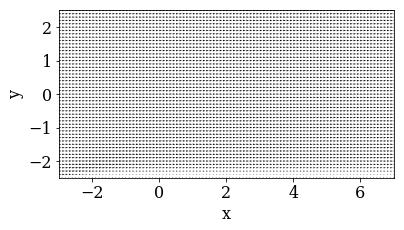

------------ Time = 2.010000000000001 ---------------
Number of poisson iterations    : 193
Final poisson residual : 9.821240062784102e-11
Max, Min, U   : 1.1277800695034295, -1.0
Max, Min, V   : 0.11980253805118417, -0.06646522268709396
Max, Min, P   : 0.39728220445350987, -0.05235245495620997
Max, Min, DIV : 5.312322526318525e-09, -6.138329844418422e-09


------------ Time = 2.020000000000001 ---------------
Number of poisson iterations    : 194
Final poisson residual : 9.293954545594774e-11
Max, Min, U   : 1.1278106120398737, -1.0
Max, Min, V   : 0.11981135399988294, -0.06646579568527865
Max, Min, P   : 0.3972648201843988, -0.05225725621240014
Max, Min, DIV : 4.830389482499142e-09, -4.9424196159331135e-09


------------ Time = 2.0300000000000007 ---------------
Number of poisson iterations    : 195
Final poisson residual : 9.489792668210347e-11
Max, Min, U   : 1.127840796381758, -1.0
Max, Min, V   : 0.11981991333615867, -0.06646637099012866
Max, Min, P   : 0.3972479910279352, -0.052

------------ Time = 2.259999999999996 ---------------
Number of poisson iterations    : 209
Final poisson residual : 9.066479374895514e-11
Max, Min, U   : 1.1285414526352626, -1.0
Max, Min, V   : 0.11997397364349237, -0.066478023669873
Max, Min, P   : 0.3969924177891626, -0.049966384008786696
Max, Min, DIV : 6.223901272833787e-09, -5.577681337631812e-09


------------ Time = 2.2699999999999956 ---------------
Number of poisson iterations    : 209
Final poisson residual : 9.015531696779338e-11
Max, Min, U   : 1.128569601272384, -1.0
Max, Min, V   : 0.1199797510622555, -0.06647841583906164
Max, Min, P   : 0.39698621053712374, -0.04987229428655712
Max, Min, DIV : 6.504781054073039e-09, -5.8922218840185e-09


------------ Time = 2.2799999999999954 ---------------
Number of poisson iterations    : 209
Final poisson residual : 8.979397609467739e-11
Max, Min, U   : 1.1285970372312355, -1.0
Max, Min, V   : 0.11998549442381232, -0.06647879833167623
Max, Min, P   : 0.3969803527459119, -0.0497784

------------ Time = 2.52999999999999 ---------------
Number of poisson iterations    : 206
Final poisson residual : 9.773353678636273e-11
Max, Min, U   : 1.128942843078324, -1.0
Max, Min, V   : 0.12011533139348068, -0.06648621670016543
Max, Min, P   : 0.3969304590504966, -0.04754412503481394
Max, Min, DIV : 5.48124743510181e-09, -6.144689340681353e-09


------------ Time = 2.53999999999999 ---------------
Number of poisson iterations    : 206
Final poisson residual : 9.585212170545384e-11
Max, Min, U   : 1.1289430205195539, -1.0
Max, Min, V   : 0.12011980283006639, -0.0664864634700013
Max, Min, P   : 0.3969317222378811, -0.04746048492425447
Max, Min, DIV : 5.5144882410429474e-09, -6.208209502034379e-09


------------ Time = 2.5499999999999896 ---------------
Number of poisson iterations    : 205
Final poisson residual : 9.843697654989461e-11
Max, Min, U   : 1.1289424312372187, -1.0
Max, Min, V   : 0.1201242113273818, -0.06648670828499562
Max, Min, P   : 0.39693320067801696, -0.04737735

------------ Time = 2.769999999999985 ---------------
Number of poisson iterations    : 195
Final poisson residual : 9.727542629611794e-11
Max, Min, U   : 1.1288354355084405, -1.0
Max, Min, V   : 0.12020741597142365, -0.06649168694150988
Max, Min, P   : 0.39701188552881295, -0.04568565241607405
Max, Min, DIV : 6.0851369082515205e-09, -4.947464937732349e-09


------------ Time = 2.7799999999999847 ---------------
Number of poisson iterations    : 195
Final poisson residual : 9.331844279961258e-11
Max, Min, U   : 1.1288299155056398, -1.0
Max, Min, V   : 0.12021070414463787, -0.06649189504439232
Max, Min, P   : 0.39701728640300954, -0.0456151191199321
Max, Min, DIV : 5.76346435854358e-09, -5.498051180996555e-09


------------ Time = 2.7899999999999845 ---------------
Number of poisson iterations    : 195
Final poisson residual : 9.083561256095828e-11
Max, Min, U   : 1.1288245302167343, -1.0
Max, Min, V   : 0.12021396065913241, -0.0664921014434268
Max, Min, P   : 0.39702283192359744, -0.04

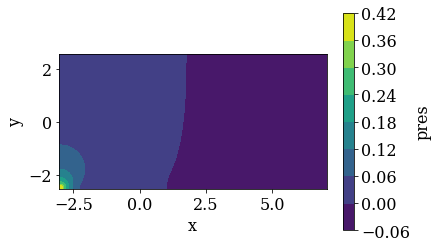

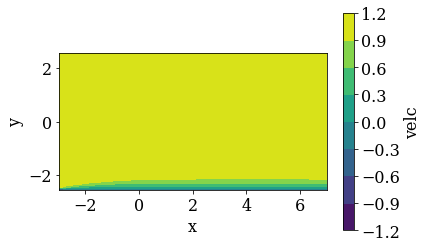

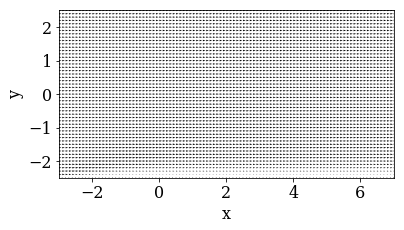

------------ Time = 3.00999999999998 ---------------
Number of poisson iterations    : 185
Final poisson residual : 9.999142047258765e-11
Max, Min, U   : 1.128734209266959, -1.0
Max, Min, V   : 0.12027881724367626, -0.06649620548777
Max, Min, P   : 0.39717547197891356, -0.04414175014217941
Max, Min, DIV : 6.594212268243305e-09, -6.419393449967614e-09


------------ Time = 3.0199999999999796 ---------------
Number of poisson iterations    : 185
Final poisson residual : 9.654331195689008e-11
Max, Min, U   : 1.1287304561091667, -1.0
Max, Min, V   : 0.12028147810681801, -0.0664963727153892
Max, Min, P   : 0.39718362251357825, -0.0440839087428023
Max, Min, DIV : 5.928897971532732e-09, -6.491031883000542e-09


------------ Time = 3.0299999999999794 ---------------
Number of poisson iterations    : 185
Final poisson residual : 9.470976713550843e-11
Max, Min, U   : 1.1287266375944707, -1.0
Max, Min, V   : 0.12028411403791996, -0.06649653835759704
Max, Min, P   : 0.3971918675836202, -0.04402656

------------ Time = 3.289999999999974 ---------------
Number of poisson iterations    : 179
Final poisson residual : 9.176723845646148e-11
Max, Min, U   : 1.1285927944169325, -1.0
Max, Min, V   : 0.12034419766513789, -0.06650034895324905
Max, Min, P   : 0.39743359859803196, -0.04269648120699798
Max, Min, DIV : 6.729374262687271e-09, -5.568291557012106e-09


------------ Time = 3.2999999999999736 ---------------
Number of poisson iterations    : 179
Final poisson residual : 9.044116707190586e-11
Max, Min, U   : 1.1285866208568343, -1.0
Max, Min, V   : 0.12034621476058786, -0.0665004784986722
Max, Min, P   : 0.3974437877553949, -0.042650987614712414
Max, Min, DIV : 7.113727757898647e-09, -5.5787098898751886e-09


------------ Time = 3.3099999999999734 ---------------
Number of poisson iterations    : 179
Final poisson residual : 8.996905130136745e-11
Max, Min, U   : 1.1285804292457955, -1.0
Max, Min, V   : 0.120348213416144, -0.06650060693156612
Max, Min, P   : 0.3974540325165211, -0.042

------------ Time = 3.519999999999969 ---------------
Number of poisson iterations    : 178
Final poisson residual : 8.917225274107e-11
Max, Min, U   : 1.1284559635957745, -1.0
Max, Min, V   : 0.12038650132714031, -0.06650307135023431
Max, Min, P   : 0.39768039297703667, -0.04173862262606186
Max, Min, DIV : 6.0130933565716305e-09, -5.324339129308964e-09


------------ Time = 3.5299999999999687 ---------------
Number of poisson iterations    : 178
Final poisson residual : 8.908027872519719e-11
Max, Min, U   : 1.1284505523826582, -1.0
Max, Min, V   : 0.12038816942993458, -0.06650317875250526
Max, Min, P   : 0.39769163604000096, -0.041700804996699516
Max, Min, DIV : 6.019475820573383e-09, -5.720547022192157e-09


------------ Time = 3.5399999999999685 ---------------
Number of poisson iterations    : 178
Final poisson residual : 8.947664309861106e-11
Max, Min, U   : 1.128445191444321, -1.0
Max, Min, V   : 0.12038982467031015, -0.06650328534159555
Max, Min, P   : 0.39770291540356706, -0.04

------------ Time = 3.7699999999999636 ---------------
Number of poisson iterations    : 178
Final poisson residual : 9.402221782877814e-11
Max, Min, U   : 1.1283307394078135, -1.0
Max, Min, V   : 0.12042450438139134, -0.06650553031160635
Max, Min, P   : 0.3979708406314263, -0.04087247795289208
Max, Min, DIV : 6.166337197799354e-09, -5.35928558476062e-09


------------ Time = 3.7799999999999634 ---------------
Number of poisson iterations    : 178
Final poisson residual : 9.431977386550426e-11
Max, Min, U   : 1.1283259422688041, -1.0
Max, Min, V   : 0.12042587207030961, -0.06650561960169359
Max, Min, P   : 0.39798279883561394, -0.04084097092218936
Max, Min, DIV : 6.2972241657299755e-09, -5.425815768900222e-09


------------ Time = 3.789999999999963 ---------------
Number of poisson iterations    : 178
Final poisson residual : 9.500622920447759e-11
Max, Min, U   : 1.1283211492578922, -1.0
Max, Min, V   : 0.12042722879820453, -0.06650570824357721
Max, Min, P   : 0.39799477822468154, -0.0

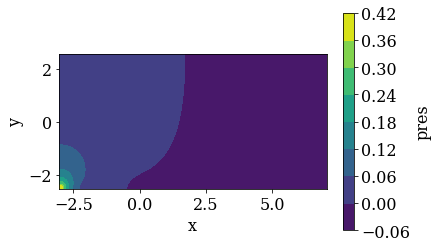

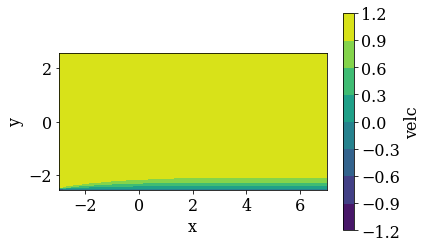

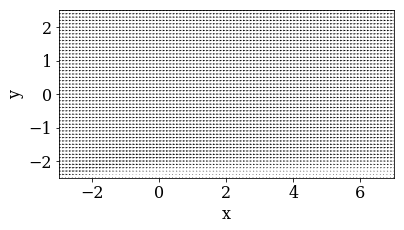

------------ Time = 4.009999999999959 ---------------
Number of poisson iterations    : 192
Final poisson residual : 9.31333107478386e-11
Max, Min, U   : 1.128217637655828, -1.0
Max, Min, V   : 0.12045454960055858, -0.06650750485312738
Max, Min, P   : 0.3982627657570223, -0.040173439578217285
Max, Min, DIV : 5.294406267564167e-09, -6.6431986647796926e-09


------------ Time = 4.019999999999959 ---------------
Number of poisson iterations    : 181
Final poisson residual : 9.919303811445754e-11
Max, Min, U   : 1.1282131036159335, -1.0
Max, Min, V   : 0.12045568735310262, -0.06650757993434366
Max, Min, P   : 0.39827504042556, -0.040146647159883524
Max, Min, DIV : 7.51779460905766e-09, -6.74405503664488e-09


------------ Time = 4.0299999999999585 ---------------
Number of poisson iterations    : 192
Final poisson residual : 9.395027812970695e-11
Max, Min, U   : 1.1282085925771388, -1.0
Max, Min, V   : 0.12045681721118073, -0.06650765450505633
Max, Min, P   : 0.3982874599908773, -0.0401202

------------ Time = 4.249999999999954 ---------------
Number of poisson iterations    : 192
Final poisson residual : 8.878664252886392e-11
Max, Min, U   : 1.1281158018240989, -1.0
Max, Min, V   : 0.12047976338819417, -0.06650917124296879
Max, Min, P   : 0.3985613000510993, -0.039581548634899065
Max, Min, DIV : 5.7629039387774306e-09, -5.6605493625738745e-09


------------ Time = 4.259999999999954 ---------------
Number of poisson iterations    : 192
Final poisson residual : 8.807847409886414e-11
Max, Min, U   : 1.1281118695881105, -1.0
Max, Min, V   : 0.12048072550831296, -0.06650923499381109
Max, Min, P   : 0.3985738156756613, -0.0395590336647367
Max, Min, DIV : 5.134121253136392e-09, -6.107992334136725e-09


------------ Time = 4.269999999999953 ---------------
Number of poisson iterations    : 192
Final poisson residual : 8.731683444671934e-11
Max, Min, U   : 1.1281079590606387, -1.0
Max, Min, V   : 0.12048168104797032, -0.06650929832865504
Max, Min, P   : 0.3985863348123523, -0.039

------------ Time = 4.4999999999999485 ---------------
Number of poisson iterations    : 190
Final poisson residual : 9.20105953217375e-11
Max, Min, U   : 1.1280229954689531, -1.0
Max, Min, V   : 0.12050194807614686, -0.06651064727761735
Max, Min, P   : 0.3988746865415766, -0.03906788127070972
Max, Min, DIV : 4.8377317082848315e-09, -7.475435114673301e-09


------------ Time = 4.509999999999948 ---------------
Number of poisson iterations    : 190
Final poisson residual : 9.019092008622873e-11
Max, Min, U   : 1.128019490969394, -1.0
Max, Min, V   : 0.12050275989390828, -0.06651070154363792
Max, Min, P   : 0.39888721848547976, -0.03904943395428319
Max, Min, DIV : 4.988962645779971e-09, -6.866771751906642e-09


------------ Time = 4.519999999999948 ---------------
Number of poisson iterations    : 190
Final poisson residual : 8.937149366487404e-11
Max, Min, U   : 1.1280160015312746, -1.0
Max, Min, V   : 0.12050356638884692, -0.0665107554741685
Max, Min, P   : 0.39889974831791114, -0.0390

------------ Time = 4.729999999999944 ---------------
Number of poisson iterations    : 155
Final poisson residual : 9.353184981756808e-11
Max, Min, U   : 1.127946384842459, -1.0
Max, Min, V   : 0.12051934911190414, -0.06651181374575975
Max, Min, P   : 0.39916218210686344, -0.0386835787409003
Max, Min, DIV : 5.94205136483783e-09, -5.9636551578111374e-09


------------ Time = 4.739999999999943 ---------------
Number of poisson iterations    : 188
Final poisson residual : 9.627750330277805e-11
Max, Min, U   : 1.1279432509342147, -1.0
Max, Min, V   : 0.12052004901616226, -0.06651186050168509
Max, Min, P   : 0.39917434977178085, -0.03866854842790188
Max, Min, DIV : 6.314009332736292e-09, -5.434810271091883e-09


------------ Time = 4.749999999999943 ---------------
Number of poisson iterations    : 138
Final poisson residual : 9.702318289202269e-11
Max, Min, U   : 1.127940133337452, -1.0
Max, Min, V   : 0.12052074464348685, -0.06651190704070242
Max, Min, P   : 0.3991870923136303, -0.038654

------------ Time = 4.999999999999938 ---------------
Number of poisson iterations    : 187
Final poisson residual : 9.954945031735018e-11
Max, Min, U   : 1.1278673070732, -1.0
Max, Min, V   : 0.12053681599477782, -0.06651298963173646
Max, Min, P   : 0.3994957033404912, -0.03833673498276609
Max, Min, DIV : 5.966167195697869e-09, -5.903224159498066e-09




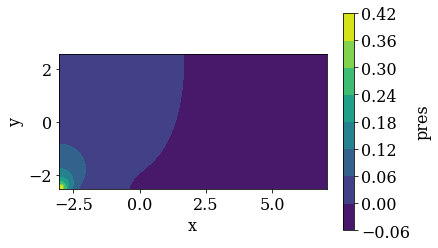

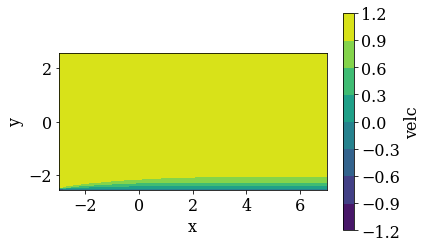

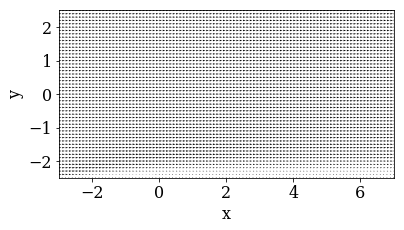

------------ Time = 5.009999999999938 ---------------
Number of poisson iterations    : 153
Final poisson residual : 8.977179572774047e-11
Max, Min, U   : 1.1278645807864667, -1.0
Max, Min, V   : 0.12053740908919011, -0.06651302971577167
Max, Min, P   : 0.39950733248889475, -0.03832544975871853
Max, Min, DIV : 5.321288444604111e-09, -5.186010787472384e-09


------------ Time = 5.019999999999937 ---------------
Number of poisson iterations    : 188
Final poisson residual : 9.697718527443814e-11
Max, Min, U   : 1.1278618697956933, -1.0
Max, Min, V   : 0.12053799891965217, -0.0665130695025903
Max, Min, P   : 0.39952018748226203, -0.03831550901912869
Max, Min, DIV : 5.721789448492887e-09, -5.687157923414676e-09


------------ Time = 5.029999999999937 ---------------
Number of poisson iterations    : 154
Final poisson residual : 8.436453346282414e-11
Max, Min, U   : 1.1278591700023683, -1.0
Max, Min, V   : 0.12053858509386184, -0.06651310940247077
Max, Min, P   : 0.39953174670956376, -0.038

------------ Time = 5.279999999999932 ---------------
Number of poisson iterations    : 189
Final poisson residual : 8.363542715261763e-11
Max, Min, U   : 1.1277957443812716, -1.0
Max, Min, V   : 0.12055216496432519, -0.06651402901211116
Max, Min, P   : 0.3998340584112813, -0.03809231435611102
Max, Min, DIV : 5.525653573590361e-09, -6.0193082809800735e-09


------------ Time = 5.289999999999932 ---------------
Number of poisson iterations    : 189
Final poisson residual : 8.396298201167308e-11
Max, Min, U   : 1.1277933638390256, -1.0
Max, Min, V   : 0.12055266804545206, -0.06651406317274244
Max, Min, P   : 0.39984599345536753, -0.03808573810527761
Max, Min, DIV : 5.369207162209122e-09, -5.696904207055931e-09


------------ Time = 5.299999999999931 ---------------
Number of poisson iterations    : 189
Final poisson residual : 8.407376428075105e-11
Max, Min, U   : 1.1277909950435672, -1.0
Max, Min, V   : 0.12055316824222431, -0.06651409714066842
Max, Min, P   : 0.3998579166927113, -0.038

------------ Time = 5.509999999999927 ---------------
Number of poisson iterations    : 189
Final poisson residual : 8.524849907860044e-11
Max, Min, U   : 1.1277438723091042, -1.0
Max, Min, V   : 0.12056304211729212, -0.06651476886428628
Max, Min, P   : 0.40010545076421766, -0.03797828338927747
Max, Min, DIV : 5.65828706805549e-09, -5.6300011319621035e-09


------------ Time = 5.519999999999927 ---------------
Number of poisson iterations    : 189
Final poisson residual : 8.53718984258537e-11
Max, Min, U   : 1.127741748213587, -1.0
Max, Min, V   : 0.12056348385134781, -0.06651479896679124
Max, Min, P   : 0.40011709648883026, -0.03797509340288028
Max, Min, DIV : 5.383569701145063e-09, -6.127559796370585e-09


------------ Time = 5.5299999999999265 ---------------
Number of poisson iterations    : 189
Final poisson residual : 8.528273050064215e-11
Max, Min, U   : 1.127739634503856, -1.0
Max, Min, V   : 0.12056392315196167, -0.06651482891490244
Max, Min, P   : 0.4001287289336345, -0.03797

------------ Time = 5.759999999999922 ---------------
Number of poisson iterations    : 189
Final poisson residual : 7.902007524195833e-11
Max, Min, U   : 1.127693733757866, -1.0
Max, Min, V   : 0.12057338708554483, -0.06651547508288574
Max, Min, P   : 0.4003924630329071, -0.037943199474738336
Max, Min, DIV : 4.870873565598899e-09, -5.398584079774338e-09


------------ Time = 5.769999999999921 ---------------
Number of poisson iterations    : 189
Final poisson residual : 7.863231535890378e-11
Max, Min, U   : 1.1276918502891895, -1.0
Max, Min, V   : 0.12057377227324301, -0.06651550143277127
Max, Min, P   : 0.40040375894514985, -0.03794375115436846
Max, Min, DIV : 5.7164329658743185e-09, -5.539884273542128e-09


------------ Time = 5.779999999999921 ---------------
Number of poisson iterations    : 189
Final poisson residual : 7.84664186228151e-11
Max, Min, U   : 1.127689975750633, -1.0
Max, Min, V   : 0.12057415537013862, -0.06651552763037182
Max, Min, P   : 0.40041504011588036, -0.0379

------------ Time = 5.989999999999917 ---------------
Number of poisson iterations    : 188
Final poisson residual : 9.12904738805436e-11
Max, Min, U   : 1.127652602530364, -1.0
Max, Min, V   : 0.12058174562604151, -0.06651604748255036
Max, Min, P   : 0.40064848995956787, -0.03799501266761677
Max, Min, DIV : 5.2039167419692944e-09, -5.532614748282594e-09


------------ Time = 5.9999999999999165 ---------------
Number of poisson iterations    : 188
Final poisson residual : 9.011405696572078e-11
Max, Min, U   : 1.127650914372559, -1.0
Max, Min, V   : 0.12058208643957723, -0.06651607084918099
Max, Min, P   : 0.40065943848756763, -0.03799915433353275
Max, Min, DIV : 6.069049013346373e-09, -5.36161726127915e-09




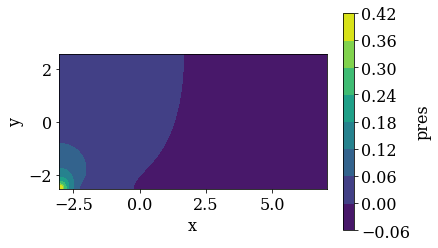

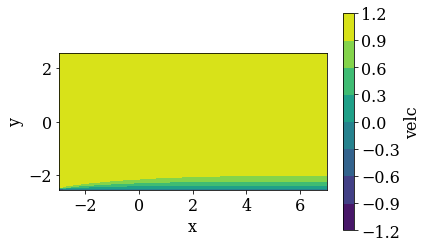

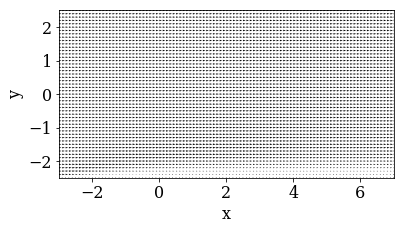

------------ Time = 6.009999999999916 ---------------
Number of poisson iterations    : 187
Final poisson residual : 9.948672768013671e-11
Max, Min, U   : 1.1276492342706228, -1.0
Max, Min, V   : 0.12058242546001682, -0.06651609411792926
Max, Min, P   : 0.4006703754984306, -0.038003455694281235
Max, Min, DIV : 6.631902071778384e-09, -5.173814363046425e-09


------------ Time = 6.019999999999916 ---------------
Number of poisson iterations    : 187
Final poisson residual : 9.53131329633625e-11
Max, Min, U   : 1.127647562052293, -1.0
Max, Min, V   : 0.12058276272629131, -0.06651611725786984
Max, Min, P   : 0.4006812892860538, -0.03800791970357884
Max, Min, DIV : 6.709148256053843e-09, -7.94619771024574e-09


------------ Time = 6.029999999999916 ---------------
Number of poisson iterations    : 187
Final poisson residual : 9.928165564290457e-11
Max, Min, U   : 1.1276458978330375, -1.0
Max, Min, V   : 0.12058309825150307, -0.06651614028845729
Max, Min, P   : 0.4006921910712739, -0.0380125

------------ Time = 6.259999999999911 ---------------
Number of poisson iterations    : 186
Final poisson residual : 9.032802403232848e-11
Max, Min, U   : 1.127609714270524, -1.0
Max, Min, V   : 0.12059035297157496, -0.06651663859490817
Max, Min, P   : 0.4009385403544549, -0.03816479082776439
Max, Min, DIV : 8.227307129841932e-09, -5.4834783588808556e-09


------------ Time = 6.269999999999911 ---------------
Number of poisson iterations    : 186
Final poisson residual : 8.86084329267981e-11
Max, Min, U   : 1.1276082280840667, -1.0
Max, Min, V   : 0.12059064931168309, -0.06651665898123767
Max, Min, P   : 0.4009490572509816, -0.03817346339775514
Max, Min, DIV : 6.79289275870576e-09, -6.1574484400139795e-09


------------ Time = 6.2799999999999105 ---------------
Number of poisson iterations    : 186
Final poisson residual : 8.830864923254943e-11
Max, Min, U   : 1.1276067488018726, -1.0
Max, Min, V   : 0.12059094413583916, -0.0665166792449567
Max, Min, P   : 0.40095955728157157, -0.03818

------------ Time = 6.489999999999906 ---------------
Number of poisson iterations    : 183
Final poisson residual : 9.405238056261933e-11
Max, Min, U   : 1.1275772244269104, -1.0
Max, Min, V   : 0.12059680196804971, -0.06651708226803257
Max, Min, P   : 0.40117620753250266, -0.038410329278707106
Max, Min, DIV : 7.957674822041405e-09, -7.008057294199954e-09


------------ Time = 6.499999999999906 ---------------
Number of poisson iterations    : 183
Final poisson residual : 9.676403301026533e-11
Max, Min, U   : 1.12757588920569, -1.0
Max, Min, V   : 0.12059706569489578, -0.06651710044431733
Max, Min, P   : 0.40118633815817933, -0.03842326850514204
Max, Min, DIV : 6.976869290631349e-09, -7.3638104034629e-09


------------ Time = 6.509999999999906 ---------------
Number of poisson iterations    : 183
Final poisson residual : 9.083780070652202e-11
Max, Min, U   : 1.12757456010874, -1.0
Max, Min, V   : 0.12059732813621885, -0.06651711851589487
Max, Min, P   : 0.40119645207358196, -0.0384364

------------ Time = 6.719999999999901 ---------------
Number of poisson iterations    : 180
Final poisson residual : 9.614431698363619e-11
Max, Min, U   : 1.1275480297503282, -1.0
Max, Min, V   : 0.12060254695384855, -0.06651747836250724
Max, Min, P   : 0.4014048372297029, -0.03875952739733753
Max, Min, DIV : 6.094661685052127e-09, -6.9804770991277465e-09


------------ Time = 6.729999999999901 ---------------
Number of poisson iterations    : 180
Final poisson residual : 9.714890723525341e-11
Max, Min, U   : 1.127546829761156, -1.0
Max, Min, V   : 0.12060278215239006, -0.06651749458169508
Max, Min, P   : 0.4014145721311866, -0.038777270272139994
Max, Min, DIV : 5.585619397563413e-09, -7.0655280584586144e-09


------------ Time = 6.739999999999901 ---------------
Number of poisson iterations    : 181
Final poisson residual : 8.441982434051457e-11
Max, Min, U   : 1.1275456352464819, -1.0
Max, Min, V   : 0.12060301619336994, -0.06651751073984721
Max, Min, P   : 0.4014242898540625, -0.038

------------ Time = 6.969999999999896 ---------------
Number of poisson iterations    : 186
Final poisson residual : 9.16903775828741e-11
Max, Min, U   : 1.1275196386957833, -1.0
Max, Min, V   : 0.12060809231039699, -0.06651786107886604
Max, Min, P   : 0.40164276698101925, -0.039273590578272524
Max, Min, DIV : 5.203238118145492e-09, -8.180139395713715e-09


------------ Time = 6.979999999999896 ---------------
Number of poisson iterations    : 186
Final poisson residual : 9.597438509261481e-11
Max, Min, U   : 1.1275185701541286, -1.0
Max, Min, V   : 0.12060830026186162, -0.06651787545057304
Max, Min, P   : 0.40165204930012005, -0.039297390850987275
Max, Min, DIV : 5.941245061029388e-09, -8.438951369302283e-09


------------ Time = 6.989999999999895 ---------------
Number of poisson iterations    : 186
Final poisson residual : 9.834781609927766e-11
Max, Min, U   : 1.127517506537198, -1.0
Max, Min, V   : 0.12060850717791106, -0.06651788972061949
Max, Min, P   : 0.40166131324821003, -0.03

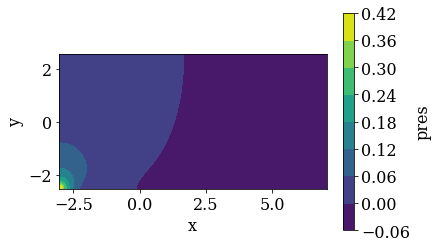

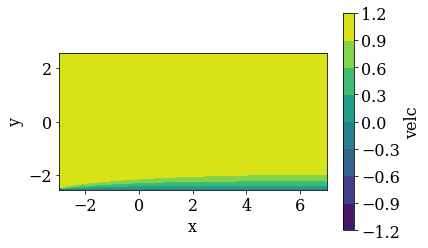

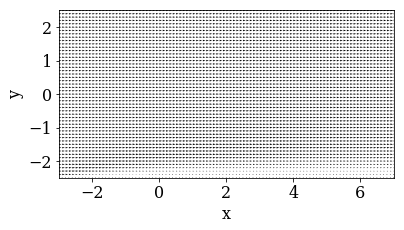

------------ Time = 7.009999999999895 ---------------
Number of poisson iterations    : 188
Final poisson residual : 9.096205837970122e-11
Max, Min, U   : 1.127515393975935, -1.0
Max, Min, V   : 0.12060891798323423, -0.06651791807236586
Max, Min, P   : 0.4016797917413316, -0.03937039454841706
Max, Min, DIV : 6.394331884731347e-09, -7.3028021303767066e-09


------------ Time = 7.019999999999895 ---------------
Number of poisson iterations    : 188
Final poisson residual : 9.177549912222758e-11
Max, Min, U   : 1.127514345105901, -1.0
Max, Min, V   : 0.12060912189388914, -0.06651793215655602
Max, Min, P   : 0.40168899619506887, -0.03939526566492077
Max, Min, DIV : 5.024581514745385e-09, -6.624750158168435e-09


------------ Time = 7.0299999999998946 ---------------
Number of poisson iterations    : 188
Final poisson residual : 9.081208023529815e-11
Max, Min, U   : 1.1275133011147098, -1.0
Max, Min, V   : 0.12060932479779776, -0.06651794616643728
Max, Min, P   : 0.4016981861140447, -0.0394

------------ Time = 7.25999999999989 ---------------
Number of poisson iterations    : 191
Final poisson residual : 7.534421058375468e-11
Max, Min, U   : 1.1274905885401327, -1.0
Max, Min, V   : 0.12061372707295645, -0.0665182500311731
Max, Min, P   : 0.4019044519474033, -0.040079612994683864
Max, Min, DIV : 5.808785674688011e-09, -6.944170849454423e-09


------------ Time = 7.269999999999889 ---------------
Number of poisson iterations    : 190
Final poisson residual : 9.797618828890198e-11
Max, Min, U   : 1.127489655414512, -1.0
Max, Min, V   : 0.12061390737961818, -0.06651826249279977
Max, Min, P   : 0.4019131886868379, -0.04011204078286318
Max, Min, DIV : 6.330999576583535e-09, -5.981783346431513e-09


------------ Time = 7.279999999999889 ---------------
Number of poisson iterations    : 190
Final poisson residual : 9.810771345584192e-11
Max, Min, U   : 1.127488726858394, -1.0
Max, Min, V   : 0.12061408688902711, -0.0665182748963834
Max, Min, P   : 0.4019219149836108, -0.040144807

------------ Time = 7.4999999999998845 ---------------
Number of poisson iterations    : 192
Final poisson residual : 8.988364477680349e-11
Max, Min, U   : 1.1274693781476073, -1.0
Max, Min, V   : 0.12061781934884552, -0.06651853235483604
Max, Min, P   : 0.4021089626829842, -0.04095792384538805
Max, Min, DIV : 6.45647685315609e-09, -6.227780791068227e-09


------------ Time = 7.509999999999884 ---------------
Number of poisson iterations    : 192
Final poisson residual : 9.603777235270201e-11
Max, Min, U   : 1.1274685462562934, -1.0
Max, Min, V   : 0.12061797951548389, -0.0665185433941893
Max, Min, P   : 0.40211724114451985, -0.040999420465305525
Max, Min, DIV : 6.297268873023398e-09, -7.556644188860817e-09


------------ Time = 7.519999999999884 ---------------
Number of poisson iterations    : 192
Final poisson residual : 9.553777642457111e-11
Max, Min, U   : 1.127467718424372, -1.0
Max, Min, V   : 0.12061813892936227, -0.066518554386116
Max, Min, P   : 0.40212549913049017, -0.041041

------------ Time = 7.72999999999988 ---------------
Number of poisson iterations    : 193
Final poisson residual : 9.8565176861815e-11
Max, Min, U   : 1.1274512401655552, -1.0
Max, Min, V   : 0.12062130751800702, -0.0665187725283308
Max, Min, P   : 0.4022943014064992, -0.04202927280925272
Max, Min, DIV : 6.605698800454807e-09, -5.322074950880884e-09


------------ Time = 7.739999999999879 ---------------
Number of poisson iterations    : 194
Final poisson residual : 7.462031088494277e-11
Max, Min, U   : 1.1274504977774975, -1.0
Max, Min, V   : 0.1206214502117856, -0.0665187823516206
Max, Min, P   : 0.4023021211926582, -0.042081892474266164
Max, Min, DIV : 5.721035589711931e-09, -4.6324388769392044e-09


------------ Time = 7.749999999999879 ---------------
Number of poisson iterations    : 193
Final poisson residual : 9.645136412291692e-11
Max, Min, U   : 1.1274497589231645, -1.0
Max, Min, V   : 0.12062159207223395, -0.06651879208850646
Max, Min, P   : 0.4023099057259484, -0.042135066

------------ Time = 7.9699999999998745 ---------------
Number of poisson iterations    : 196
Final poisson residual : 8.119793553502216e-11
Max, Min, U   : 1.1274344333548552, -1.0
Max, Min, V   : 0.12062453430579052, -0.0665189938695517
Max, Min, P   : 0.4024760593600676, -0.043458533402480355
Max, Min, DIV : 4.655724417101936e-09, -4.556957172718867e-09


------------ Time = 7.979999999999874 ---------------
Number of poisson iterations    : 196
Final poisson residual : 8.596977297727451e-11
Max, Min, U   : 1.1274337780619008, -1.0
Max, Min, V   : 0.12062466017117646, -0.06651900248026005
Max, Min, P   : 0.4024833653379844, -0.04352635470641694
Max, Min, DIV : 5.456598996863432e-09, -6.5786665733036376e-09


------------ Time = 7.989999999999874 ---------------
Number of poisson iterations    : 196
Final poisson residual : 8.704936194970562e-11
Max, Min, U   : 1.127433126302188, -1.0
Max, Min, V   : 0.12062478518967407, -0.06651901101906263
Max, Min, P   : 0.40249064849637783, -0.043

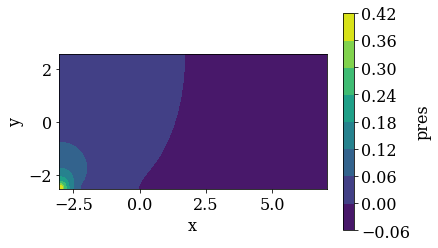

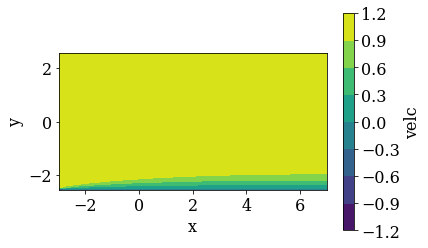

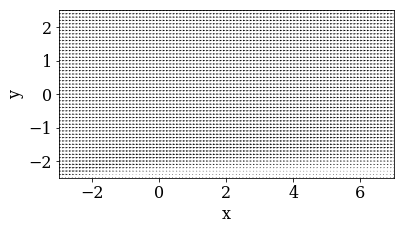

------------ Time = 8.009999999999874 ---------------
Number of poisson iterations    : 196
Final poisson residual : 9.197960340761113e-11
Max, Min, U   : 1.1274318333150377, -1.0
Max, Min, V   : 0.12062503343856751, -0.06651902798440569
Max, Min, P   : 0.40250514999499576, -0.04373422755709214
Max, Min, DIV : 6.024266918647214e-09, -5.153200765412036e-09


------------ Time = 8.019999999999873 ---------------
Number of poisson iterations    : 196
Final poisson residual : 9.316901961603812e-11
Max, Min, U   : 1.1274311920728068, -1.0
Max, Min, V   : 0.12062515661083772, -0.06651903640149232
Max, Min, P   : 0.4025123677713797, -0.04380501501613433
Max, Min, DIV : 4.79183998036703e-09, -4.913974742740135e-09


------------ Time = 8.029999999999873 ---------------
Number of poisson iterations    : 196
Final poisson residual : 9.712429099157481e-11
Max, Min, U   : 1.1274305543426748, -1.0
Max, Min, V   : 0.12062527896893298, -0.06651904474722198
Max, Min, P   : 0.4025195632489124, -0.04387

------------ Time = 8.259999999999868 ---------------
Number of poisson iterations    : 203
Final poisson residual : 8.814684132523083e-11
Max, Min, U   : 1.1274168368766675, -1.0
Max, Min, V   : 0.12062791501964666, -0.06651922395391888
Max, Min, P   : 0.4026788162782818, -0.04584188156016777
Max, Min, DIV : 8.353845093109213e-09, -9.931323688774918e-09


------------ Time = 8.269999999999868 ---------------
Number of poisson iterations    : 203
Final poisson residual : 8.419989723229071e-11
Max, Min, U   : 1.1274162812057174, -1.0
Max, Min, V   : 0.12062802194127951, -0.06651923113700434
Max, Min, P   : 0.40268546185100595, -0.04594676207809216
Max, Min, DIV : 6.905307381455117e-09, -6.742299080153558e-09


------------ Time = 8.279999999999868 ---------------
Number of poisson iterations    : 203
Final poisson residual : 9.053190042251228e-11
Max, Min, U   : 1.1274157288612823, -1.0
Max, Min, V   : 0.1206281282104122, -0.0665192383758174
Max, Min, P   : 0.40269208550221985, -0.04605

------------ Time = 8.489999999999863 ---------------
Number of poisson iterations    : 205
Final poisson residual : 9.0049011245766e-11
Max, Min, U   : 1.1274048928596823, -1.0
Max, Min, V   : 0.120630218575083, -0.06651937931708912
Max, Min, P   : 0.4028256203350555, -0.04852610575610864
Max, Min, DIV : 5.68465425253295e-09, -6.792541897004956e-09


------------ Time = 8.499999999999863 ---------------
Number of poisson iterations    : 205
Final poisson residual : 9.356541678092895e-11
Max, Min, U   : 1.1274044127441716, -1.0
Max, Min, V   : 0.12063031142794041, -0.06651938556523877
Max, Min, P   : 0.40283171176073274, -0.04865565889903708
Max, Min, DIV : 5.415015658094546e-09, -5.2223762363190485e-09


------------ Time = 8.509999999999863 ---------------
Number of poisson iterations    : 205
Final poisson residual : 9.512042194304054e-11
Max, Min, U   : 1.1274039357955126, -1.0
Max, Min, V   : 0.12063040378533096, -0.06651939172715646
Max, Min, P   : 0.40283777852412295, -0.0487862

------------ Time = 8.719999999999859 ---------------
Number of poisson iterations    : 206
Final poisson residual : 9.922323090416431e-11
Max, Min, U   : 1.1273946457131419, -1.0
Max, Min, V   : 0.120632209389339, -0.06651951214034249
Max, Min, P   : 0.4029595266030711, -0.05173696556213422
Max, Min, DIV : 8.27472113051897e-09, -6.884418533512071e-09


------------ Time = 8.729999999999858 ---------------
Number of poisson iterations    : 207
Final poisson residual : 9.859125559984871e-11
Max, Min, U   : 1.1273942370535803, -1.0
Max, Min, V   : 0.12063228919172617, -0.06651951757559202
Max, Min, P   : 0.4029650577914412, -0.05188533420854778
Max, Min, DIV : 8.313768146139822e-09, -5.955428364866344e-09


------------ Time = 8.739999999999858 ---------------
Number of poisson iterations    : 207
Final poisson residual : 9.863934061173221e-11
Max, Min, U   : 1.1273938312142295, -1.0
Max, Min, V   : 0.12063236852289955, -0.06651952283792262
Max, Min, P   : 0.40297056511481544, -0.0520341

------------ Time = 8.969999999999853 ---------------
Number of poisson iterations    : 208
Final poisson residual : 8.689390763339044e-11
Max, Min, U   : 1.1273852639576447, -1.0
Max, Min, V   : 0.12063405367986761, -0.06651963540024115
Max, Min, P   : 0.4030910317730819, -0.055459970804602424
Max, Min, DIV : 5.750054911379809e-09, -6.227063935673738e-09


------------ Time = 8.979999999999853 ---------------
Number of poisson iterations    : 208
Final poisson residual : 8.644275483369873e-11
Max, Min, U   : 1.127384922176709, -1.0
Max, Min, V   : 0.12063412137940593, -0.0665196399777758
Max, Min, P   : 0.4030960199474411, -0.05560247439830476
Max, Min, DIV : 6.833097421221623e-09, -5.8181329545825555e-09


------------ Time = 8.989999999999853 ---------------
Number of poisson iterations    : 208
Final poisson residual : 8.567059166085904e-11
Max, Min, U   : 1.1273845826900784, -1.0
Max, Min, V   : 0.12063418869058032, -0.06651964451888001
Max, Min, P   : 0.4031009892887754, -0.05574

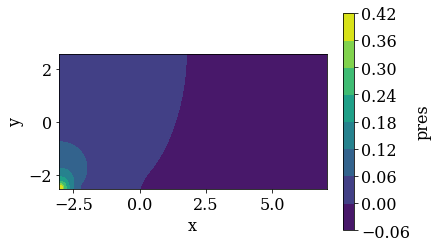

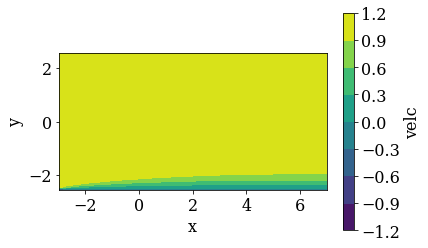

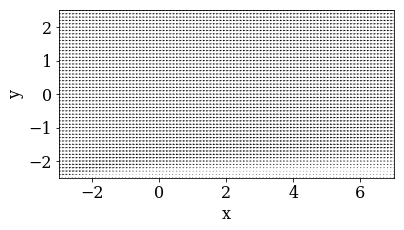

------------ Time = 9.009999999999852 ---------------
Number of poisson iterations    : 208
Final poisson residual : 8.348002837914112e-11
Max, Min, U   : 1.127383910464935, -1.0
Max, Min, V   : 0.12063432208320947, -0.06651965355221201
Max, Min, P   : 0.40311087359857045, -0.056022514312980644
Max, Min, DIV : 5.3849226987201515e-09, -6.169638569128444e-09


------------ Time = 9.019999999999852 ---------------
Number of poisson iterations    : 208
Final poisson residual : 8.238100852865172e-11
Max, Min, U   : 1.1273835776207357, -1.0
Max, Min, V   : 0.12063438816174411, -0.06651965804508585
Max, Min, P   : 0.40311578921430913, -0.05615973428366287
Max, Min, DIV : 6.341431685319421e-09, -5.707141981226016e-09


------------ Time = 9.029999999999852 ---------------
Number of poisson iterations    : 207
Final poisson residual : 9.893453191966943e-11
Max, Min, U   : 1.1273832469504674, -1.0
Max, Min, V   : 0.12063445403772219, -0.06651966247667493
Max, Min, P   : 0.40312068857870414, -0.0

------------ Time = 9.249999999999847 ---------------
Number of poisson iterations    : 195
Final poisson residual : 9.504186339344205e-11
Max, Min, U   : 1.1273764119390919, -1.0
Max, Min, V   : 0.12063581913680686, -0.06651975785627295
Max, Min, P   : 0.4032249011015561, -0.058682651779623174
Max, Min, DIV : 6.730074796068575e-09, -6.5667083992693165e-09


------------ Time = 9.259999999999847 ---------------
Number of poisson iterations    : 194
Final poisson residual : 9.814973787253052e-11
Max, Min, U   : 1.1273761160616462, -1.0
Max, Min, V   : 0.12063587862952509, -0.06651976213712418
Max, Min, P   : 0.4032295196887299, -0.05875429473257795
Max, Min, DIV : 6.6780907193031425e-09, -7.58311271414902e-09


------------ Time = 9.269999999999847 ---------------
Number of poisson iterations    : 193
Final poisson residual : 9.699006489707236e-11
Max, Min, U   : 1.1273758209115188, -1.0
Max, Min, V   : 0.12063593760359839, -0.06651976648365263
Max, Min, P   : 0.40323413343224285, -0.05

------------ Time = 9.499999999999842 ---------------
Number of poisson iterations    : 196
Final poisson residual : 8.511039580154725e-11
Max, Min, U   : 1.1273690833020298, -1.0
Max, Min, V   : 0.12063728239578463, -0.06651986922594777
Max, Min, P   : 0.4033398380488079, -0.05915864168139357
Max, Min, DIV : 7.328763013125794e-09, -7.498556220397745e-09


------------ Time = 9.509999999999842 ---------------
Number of poisson iterations    : 196
Final poisson residual : 9.494848517177061e-11
Max, Min, U   : 1.1273687845088423, -1.0
Max, Min, V   : 0.1206373415013026, -0.06651987393874481
Max, Min, P   : 0.403344479894755, -0.059109939075943536
Max, Min, DIV : 6.242438376109771e-09, -7.049212547016737e-09


------------ Time = 9.519999999999841 ---------------
Number of poisson iterations    : 196
Final poisson residual : 9.850369472114184e-11
Max, Min, U   : 1.1273684845620489, -1.0
Max, Min, V   : 0.12063740072224619, -0.06651987869655641
Max, Min, P   : 0.40334912496390674, -0.05905

------------ Time = 9.729999999999837 ---------------
Number of poisson iterations    : 209
Final poisson residual : 9.753888671426436e-11
Max, Min, U   : 1.1273617773051043, -1.0
Max, Min, V   : 0.12063870241859415, -0.06651998637874673
Max, Min, P   : 0.4034493952251379, -0.05652537185472254
Max, Min, DIV : 8.263470324676447e-09, -5.795726121249345e-09


------------ Time = 9.739999999999837 ---------------
Number of poisson iterations    : 210
Final poisson residual : 8.84357114190065e-11
Max, Min, U   : 1.127361432279778, -1.0
Max, Min, V   : 0.12063876798573134, -0.06651999193583387
Max, Min, P   : 0.40345433633720396, -0.056341077251136885
Max, Min, DIV : 5.267925366758686e-09, -5.375723366451979e-09


------------ Time = 9.749999999999837 ---------------
Number of poisson iterations    : 210
Final poisson residual : 9.188623028178346e-11
Max, Min, U   : 1.1273610844803845, -1.0
Max, Min, V   : 0.12063883405836438, -0.06651999754597823
Max, Min, P   : 0.40345928943169235, -0.0561

------------ Time = 9.979999999999832 ---------------
Number of poisson iterations    : 212
Final poisson residual : 9.87850492377417e-11
Max, Min, U   : 1.1273522090853054, -1.0
Max, Min, V   : 0.12064047632642919, -0.06652013661352613
Max, Min, P   : 0.40357817692238757, -0.05091244920343172
Max, Min, DIV : 5.434944300164446e-09, -6.543456471108655e-09


------------ Time = 9.989999999999831 ---------------
Number of poisson iterations    : 212
Final poisson residual : 9.745504069575825e-11
Max, Min, U   : 1.1273517826941295, -1.0
Max, Min, V   : 0.12064055321834276, -0.06652014303199397
Max, Min, P   : 0.4035835552426578, -0.05065519413901122
Max, Min, DIV : 5.569344096144346e-09, -5.9791504386508265e-09


------------ Time = 9.999999999999831 ---------------
Number of poisson iterations    : 212
Final poisson residual : 9.958844886909919e-11
Max, Min, U   : 1.1273513529710164, -1.0
Max, Min, V   : 0.12064063058698601, -0.06652014948953272
Max, Min, P   : 0.40358894636118336, -0.050

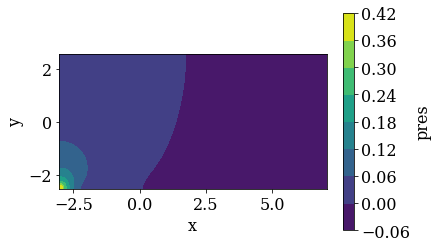

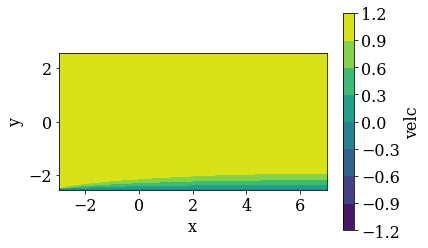

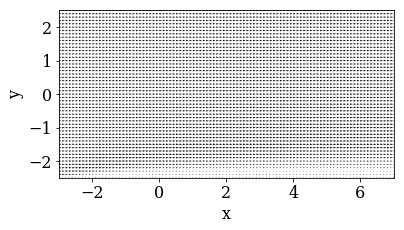

------------ Time = 10.009999999999831 ---------------
Number of poisson iterations    : 212
Final poisson residual : 9.916595055015982e-11
Max, Min, U   : 1.1273509197555802, -1.0
Max, Min, V   : 0.1206407083443396, -0.06652015595152662
Max, Min, P   : 0.4035943531571204, -0.05013460042962524
Max, Min, DIV : 7.1110407649094265e-09, -6.46917770394384e-09




In [4]:
while scalars.variable['time'] <= scalars.variable['tmax']:
    
    ins.advance()
    scalars.advance()
    
    # Display stats
    if scalars.variable['nstep'] % 1 == 0:
        flowx.io.display_stats(scalars)  
        
    if scalars.variable['nstep'] % 100 == 0:
        flowx.io.plot_contour(gridc, 'pres')
        flowx.io.plot_contour(gridx, 'velc')
        flowx.io.plot_vector(gridx,gridy,'velc')           

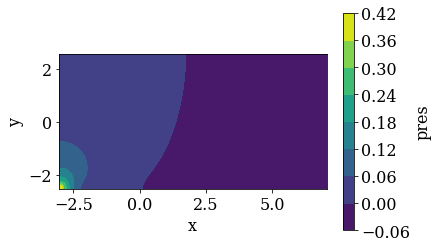

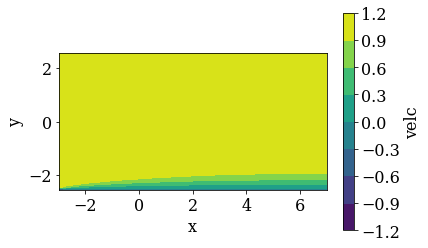

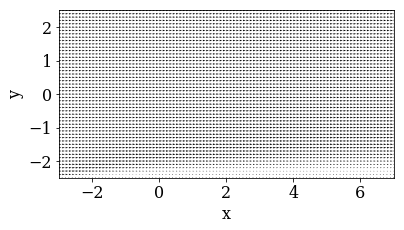

In [5]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_vector(gridx,gridy,'velc')